
<h1>Содержание</h1>

0. [Введение](#intro)
     - 0.1. [Описание проекта](#subp01)
     - 0.2. [Описание данных](#subp02)
     
1. [Изучение общей информаци](#par1)
2. [Подготовка данных](#par2)
     - 2.1. [Столбцы](#subp21)
     - 2.2. [Типы данных](#subp22)
     - 2.3. [Обработка пропусков](#subp23)
     - 2.4. [Расчёт суммарных продаж](#subp24)
3. [Исследовательский анализ данных](#par3)
     - 3.1. [Игры по годам](#subp31)
     - 3.2. [Игры по платформам](#subp32)
     - 3.3. [Данные за актуальный период](#subp33)
     - 3.4. [Анализ платформ](#subp34)
     - 3.5. [График «ящик с усами»](#subp35)     
     - 3.6. [Диаграмма рассеяния](#subp36)
     - 3.7. [Продажи игр на других платформах](#subp37)
     - 3.8. [Распределение игр по жанрам](#subp38)
4. [Портрет пользователя](#par4)
     - 4.1. [Самые популярные плаформы](#subp41)
     - 4.2. [Самые популярные жанры](#subp42)
     - 4.3. [Рейтин ESRB](#subp43)
5. [Проверка гипотез](#par5)
     - 5.1. [Средние рейтинги платформ Xbox One и PC](#subp51)
     - 5.2. [Средние рейтинг жанров Action и Sports](#subp52)
6. [Общий вывод](#par6)

## 0.  Введение <a name="intro"></a>

Сборный проект по первому блоку - самостоятельный аналитический кейс. 

### 0.1.  Описание проекта<a name="subp01"></a>

Вы работаете в интернет-магазине **«Стримчик»**, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура **ESRB** (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### 0.2. Описание данных<a name="subp02"></a>
- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## 1. Изучение общей информации <a name="par1"></a>
Откроем файл с данными и изучим общую информацию. Импортируем библиотеку pandas. Считываем данные из csv-файла в датафрейм и сохраняем в переменную `data`.

Путь к файлу: `/datasets/games.csv.`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
 

Выведем первые 10 строчек датафрейма `data` на экран.

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Уже по первым 10 строкам видно, что в данных есть пропуски - в столбце с рейтингом. Видим, что пропуски есть у игр 1985, 1996, 1989 года выпуска: возможно, это связано с тем, что эти игры вышли раньше, чем стали проставляться рейтинги, например, **ESRB** появилась лишь в 1994 году, согласно [Википедии](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board).

Рассмотрим информацию подробнее - выведем основную информацию о датафрейме с помощью метода `info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что большая часть пропусков - в данных по рейтингам.

## 2. Подготовка данных<a name="par2"></a>
Подготовим данные в таблице для более удобного анализа. Посмотрим названия столбцов, заменим тип данных, где это необходимо, проверим на наличие дубликатов и пропусков. Постараемся понять, с чем связаны пропуски и каким образом их лучше обработать. 

### 2.1.  Столбцы<a name="subp21"></a>

Из таблицы видно, что в названии стобцов встречаются прописные буквы, заменим регистр и проверим, что в названиях столбцов больше нет других проблем. В итоговом варианте столбцы читаются нормально.

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2.  Типы данных <a name="subp22"></a>

Преобразуем тип данных в нужные типы. В столбцах `user_score` и `rating` типом данных указан `object` - нужно посмотреть,  насколько это корректно. Рассмотрим это подробнее ниже, при обработке пропусков.

Год в записан не в стиле даты, а в стиле `float`, но это не мешает анализу и оценке.

### 2.3.  Обработка пропусков <a name="subp23"></a>

Посмотрим разные типы пропусков данных: пропуски есть в названиях, в году выпуска, 

In [8]:
columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',\
           'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
for col in columns:
    print(f'Количество пропусков в столбце {col} - {data[col].isnull().sum()}')

Количество пропусков в столбце name - 2
Количество пропусков в столбце platform - 0
Количество пропусков в столбце year_of_release - 269
Количество пропусков в столбце genre - 2
Количество пропусков в столбце na_sales - 0
Количество пропусков в столбце eu_sales - 0
Количество пропусков в столбце jp_sales - 0
Количество пропусков в столбце other_sales - 0
Количество пропусков в столбце critic_score - 8578
Количество пропусков в столбце user_score - 6701
Количество пропусков в столбце rating - 6766


В столбце имя и жанр - встречаются два пропуска, по этим двум строкам нет ни имени, ни жанра, ни рейтингов, но есть год выпуска и количество продаж по регионам - эти данные могут пригодится, заменим название на NoName NoGenre.

In [9]:
data_name = data.sort_values(by= 'name', ascending=True)
data_name.tail(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9134,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,0.00,0.00,0.14,0.00,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
data['name'] = data['name'].replace(np.NaN,'No Name')
data['genre'] = data['genre'].replace(np.NaN,'No Genre')

 В столбце `years_of_release` есть 269 пропусков. Заменим эти пропуски на заглушку - 2161 год (год начала событий по сюжету оригинальной **Fallout**) 

In [11]:
data['year_of_release'] = data['year_of_release'].replace(np.NaN,2161.0)
data['year_of_release'].describe()

count    16715.000000
mean      2008.971283
std         20.299045
min       1980.000000
25%       2003.000000
50%       2008.000000
75%       2011.000000
max       2161.000000
Name: year_of_release, dtype: float64

Посмотрим пропуски в столбце `user_score`. 

In [12]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Видим знаяение **tbd** - вероятно, это аббревиатура **to be determined** - значит, рейтинга ещё нет, заменим эти значения заглушкой 66.6 Затем поменяем тип данных с объект на числовой и округлим. После этого проверим, что замена работает.
Значения NaN менять не будем - информация о том, что значение пропущено может быть важным при анализе.

In [13]:
data['user_score'] = data['user_score'].replace('tbd', '66.6')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')
data['user_score'].sort_values().unique()

array([ 0. ,  0.2,  0.3,  0.5,  0.6,  0.7,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,
        2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,
        3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,
        4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,
        5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,
        6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,
        8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,
        9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7, 66.6,  nan])

In [14]:
data['user_score'].describe()

count    10014.000000
mean        21.521620
std         25.509691
min          0.000000
25%          6.800000
50%          8.000000
75%          9.200000
max         66.600000
Name: user_score, dtype: float64

Посмотрим, верна ли гипотеза, что рейтингов нет там, где ещё не проставлялись рейтинги. Составим сводную таблицу по пропускам во всех типах рейтингов. 

Видим, что пропуски появляются начиная с **2000** годов и набирают максимум в **2009**. Существенное снижение пробелов начинается с 2011 года - это может быть связано с тем, что в апреле 2011 года **ESRB** представила свою короткую форму -  оптимизированный автоматизированный процесс присвоения рейтингов консольным играм, загружаемым на консоль, как способ решения проблемы быстро растущего количества игр, доставляемых в цифровом виде. Каждый продукт проверяется не вручную, а с помощью автоматической оценки на основе серии вопросов. 

Статья по [ссылке](https://www.mcvuk.com/business-news/esrb-automates-ratings-process/)

Построим график для большей наглядности. 

In [15]:
data_no_score = data[(data['critic_score'].isnull())|(data['user_score'].isnull())| (data['rating'].isnull())]
data_no_score_stat = data_no_score.pivot_table(index=['year_of_release'],\
            values=['critic_score','rating', 'user_score'], aggfunc=['count']).reset_index()

data_no_score_stat.columns = ['year_of_release','count_critic_score','count_rating','count_user_score']
data_no_score_stat

,year_of_release,count_critic_score,count_rating,count_user_score
0,1980.0,0,0,0
1,1981.0,0,0,0
2,1982.0,0,0,0
3,1983.0,0,0,0
4,1984.0,0,0,0
5,1985.0,0,0,0
6,1986.0,0,0,0
7,1987.0,0,0,0
8,1988.0,0,0,0
9,1989.0,0,0,0


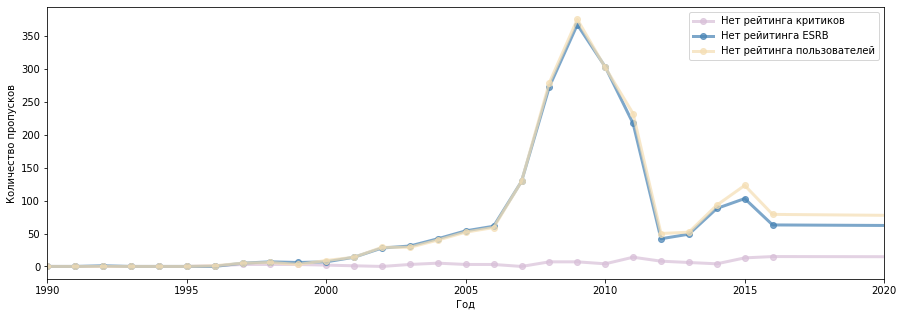

In [16]:
data_no_score_stat.plot(
    x='year_of_release',xlim=(1990,2020),alpha=0.7,style='o-',figsize=(15,5),\
    color=('thistle','steelblue', 'wheat'),linewidth=3)

plt.legend(['Нет рейтинга критиков', 'Нет рейитинга ESRB','Нет рейтинга пользователей'])
plt.xlabel('Год')
plt.ylabel('Количество пропусков')
plt.show()

Замечаем, что график рейтинга пользователей и рейтинга ESRB очень похожи, посмотрим корреляции.

In [17]:
data_no_score_stat.corr()

,year_of_release,count_critic_score,count_rating,count_user_score
year_of_release,1.000000,0.436128,0.195324,0.189239
count_critic_score,0.436128,1.000000,0.528287,0.559666
count_rating,0.195324,0.528287,1.000000,0.998685
count_user_score,0.189239,0.559666,0.998685,1.000000


Графики корреляции показываюь **0.99** степень корреляции между двумя показателями. Вероятно, на пропуски в данных как на рейтинг пользователей, так и на рейтинг ESRB влияют одни и те же факторы, либо один из рейтингов непосредственно зависит от другого.

Посмотрим данные по рейтингу **ESRB** 

In [18]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Видим, что также есть пропуски и разные значения, в том числе NaN. Другие значения можно понять по описаниям рейтингов, доступпных по методолгоии ESRB.

|     **Рейтинг**     	|  **Расшифровка** 	|     **Годы**    	|                           **Описание**                           	|
|:-------------------:	|:----------------	|:---------------	|:----------------------------------------------------------------	|
|        **RP**       	|  Rating Pending  	|  1994 - present 	| Games that have not yet been assigned a final rating by the ESRB 	|
|        **E**        	|     Everyone     	| 1998 - present  	|            Games suitable for all ages (formerly K-A)            	|
|       **K-A**       	|     Everyone     	|   1994 - 1998   	|                    Games suitable for all ages                   	|
|       **E10+**      	|   Everyone 10+   	|  2005 - present 	|                Games suitable for ages 10 and over               	|
|        **T**        	|       Teen       	|  1994 - present 	|                Games suitable for ages 13 and over               	|
|        **M**        	|    Mature 17+    	|  1994 - present 	|                Games suitable for ages 10 and over               	|
|        **AO**       	| Adults Only 18+  	|  1994 - present 	|                Games suitable for ages 18 and over               	|
| **EC** 	|  Early Childhood 	|   1994 - 2018   	|             Games aimed towards a preschool audience             	|

In [19]:
data_no_rating = data[(data['rating'].isnull())]
data_rating = data[~(data['rating'].isnull())]

print(f'Доля пропусков составляет {data_no_rating.shape[0]/data.shape[0]:.1%}')
print()
regions =['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for s in regions:
    
    print(f'Продажи без рейтинга {s} составляют {data_no_rating[s].sum():.1f} млн. копий')
    print(f'Продажи всего {s} составляют {data[s].sum():.1f} млн. копий')
    print(f'Доля продаж без рейтинга от общих продаж составляет {(data_no_rating[s].sum()/data[s].sum()):.1%}')
    print()


Доля пропусков составляет 40.5%

Продажи без рейтинга na_sales составляют 1242.5 млн. копий
Продажи всего na_sales составляют 4402.4 млн. копий
Доля продаж без рейтинга от общих продаж составляет 28.2%

Продажи без рейтинга eu_sales составляют 613.8 млн. копий
Продажи всего eu_sales составляют 2424.7 млн. копий
Доля продаж без рейтинга от общих продаж составляет 25.3%

Продажи без рейтинга jp_sales составляют 842.0 млн. копий
Продажи всего jp_sales составляют 1297.4 млн. копий
Доля продаж без рейтинга от общих продаж составляет 64.9%

Продажи без рейтинга other_sales составляют 151.1 млн. копий
Продажи всего other_sales составляют 791.3 млн. копий
Доля продаж без рейтинга от общих продаж составляет 19.1%



Вероятнее всего, большое количество пропусков связано с тем, что система рейтингов ESRB широко используется в Америке и 
Канаде и обеспечивается за счет добровольного использования североамериканской индустрии видеоигр и розничной торговли для  релизов; большинство магазинов требуют, чтобы покупатели предъявляли удостоверение личности с фотографией при покупке игр с наивысшим возрастным рейтингом ESRB. Вроятно, рейтинг актуален для продаж в Северной Америке и не так актуален для продаж в других регионах.

Как мы видим из расчёта выше, больше всего продаж игр без рейтинга - в Японии (почти две трети). 

In [20]:
data['rating'] = data['rating'].replace(np.NaN, 'unknown')

In [21]:
data.groupby('rating')['name'].count()

rating
AO            1
E          3990
E10+       1420
EC            8
K-A           3
M          1563
RP            3
T          2961
unknown    6766
Name: name, dtype: int64

In [22]:
data['rating'] = data['rating'].replace({"AO":"M", "EC" :"E10+","K-A":"E","RP":'unknown'})

Заменим рейтинги, которые встревчаются редко, на более распространённые - AO на М, EC на E10, KA на Е,RP - unknown.

In [23]:
data.groupby('rating')['name'].count()

rating
E          3993
E10+       1428
M          1564
T          2961
unknown    6769
Name: name, dtype: int64

### 2.4.  Суммарные продажи <a name="subp24"></a>

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [24]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']  

Посмотрим распределение рейтингов в зависимости от года продажи.

In [25]:
data['rating'].sort_values().unique()

array(['E', 'E10+', 'M', 'T', 'unknown'], dtype=object)

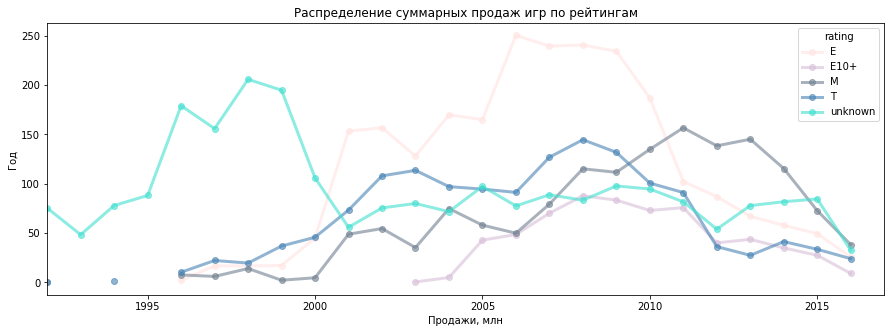

In [26]:
rating_score = ['E', 'E10+', 'M', 'T', 'unknown']
rating_sales  = data[data['year_of_release'] != 2161]

 
rating_sales = rating_sales.query('rating == @rating_score').pivot_table(index='year_of_release',
                                            values='total_sales',
                                            columns='rating',
                                            aggfunc='sum')
                                                 
rating_sales.plot(style='o-',figsize=(15,5),alpha =0.6,linewidth=3, xlim=(1992,2017),\
                    color=('mistyrose', 'thistle', 'slategrey','steelblue', 'turquoise', 'wheat','rosybrown','cadetblue'))

plt.title('Распределение cуммарных продаж игр по рейтингам')
plt.xlabel('Продажи, млн')
plt.ylabel('Год')
plt.show()

Видим, что наиболее популярный рейтинг книг - игры для всех, особенный пик приходится на 2005-2010 гг. Игры для людей старше 17 набирают популярность после 2010 года. 
Однако и по графику видно общее снижение продаж в 2016 году.

Посмотрим, нет ли дубликатов в данных.

In [27]:
data.duplicated().sum()

0

In [28]:
data_sort = data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
data_sort.shape[0]/data.shape[0] 

0.00023930601256356567

По столбцам *имя-консоль-год* дублей также не видно.

## 3. Исследовательский анализ данных <a name="par3"></a>

Проанализируем данные более детально.

### 3.1. Игры по годам <a name="subp31"></a>
Посмотрим, сколько игр выпускалось в разные годы.

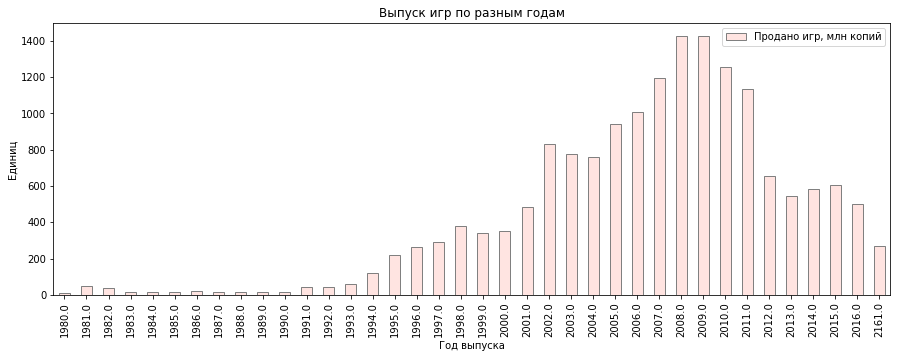

In [29]:
data.groupby('year_of_release').agg({'total_sales': ['count']})\
            .plot(kind='bar', figsize=(15,5),color=('mistyrose', 'thistle'), ec='gray')

plt.title('Выпуск игр по разным годам')    
plt.legend(['Продано игр, млн копий'])
plt.xlabel('Год выпуска')
plt.ylabel('Единиц')
plt.show()

Видим, что до 1995 года игр выходило менее чем 200 штук в год, эти данные очень обрывочны. Пик приходится на 2009 и 2010 год. 

### 3.2. Игры по платформам <a name="subp32"></a>
Посмотрим, как менялись продажи по платформам. 

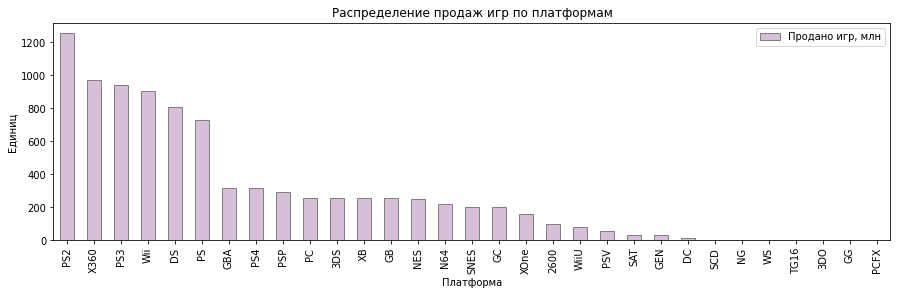

In [28]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)\
                                       .plot(kind='bar', figsize=(15,4),color=('thistle'), ec='gray')
plt.title('Распределение продаж игр по платформам')
plt.legend(['Продано игр, млн'])
plt.xlabel('Платформа')
plt.ylabel('Единиц')
plt.show()

Возьмём топ-шесть платформ: **PS2**,**X360**,**PS3**,**Wii**,**DS**,**PS** - платформы с суммарными продажами более 350 млн.

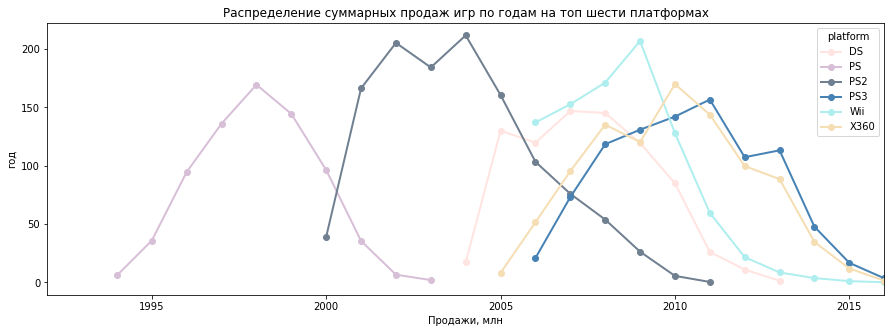

In [29]:
top_six = ['PS2','X360','PS3','Wii','DS','PS']
platform_sales  = data[data['year_of_release'] != 2161]

 
platform_sales = platform_sales.query('platform == @top_six').pivot_table(index='year_of_release',
                                            values='total_sales',
                                            columns='platform',
                                            aggfunc='sum')
                                                 
platform_sales.plot(style='o-',figsize=(15,5),xlim=(1992,2016),\
                    color=('mistyrose', 'thistle', 'slategrey','steelblue', 'paleturquoise', 'wheat'),linewidth=2)

plt.title('Распределение cуммарных продаж игр по годам на топ шести платформах')
plt.xlabel('Продажи, млн')
plt.ylabel('год')
plt.show()

Платформы с наибольшими суммарными продажами имеют схожее распределение по годам. 

В среденем за 10 лет платформа появляется, набирает пика продаж, затем продажи постепенно снижаются и появляется новая платформа.

Посмотрим, сколько в среднем "живёт" платформа.

In [30]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'No Genre'], dtype=object)

In [31]:
platform_life = data[data['year_of_release'] != 2161]
#сортируем заглушку
platform_life = platform_life[platform_life['year_of_release'] != 1985]
#сортируем одно выпадающее значение
platform_life = platform_life.query('platform == @top_six').pivot_table(index='platform',values='year_of_release',aggfunc=('min','max'))
platform_life['life_span'] = platform_life['max'] - platform_life['min']
platform_life['life_span'].median()

10.0

Видим, что в среденем за 10 лет платформа появляется, набирает пика продаж, затем продажи постепенно снижаются и появляется новая платформа.

### 3.3. Данные за актуальный период <a name="subp33"></a>
Возьмём данные за соответствующий актуальный период.

Актуальный период определим исходя из ьекущего анализа. 
Основной фактор - данные должны помочь построить прогноз на 2017 год.
Важно учесть, что срок жизни платформы - 10 лет (т.е. больше, чем десять лет брать неактуально).
Возмём данные с 2008 года - это пик продаж (2008 и 2009 год), это входит в срок жизни платформы, в этот период уже есть большие данные по рейтингу. 
Однако автоматически проставляемый рейтинг появляется только с 2012 года, кроме того в 2011 заканчиваются релизы на платформе PS.
В данном случае я возьму данные с 2014 года включительно, когда уже работает автоматический рейтинг и когда нет старой алатформы.

### 3.4. Анализ платформ <a name="subp34"></a>
Посмотрим, какие платформы лидируют по продажами выберем несколько потенциально прибыльных платформ.

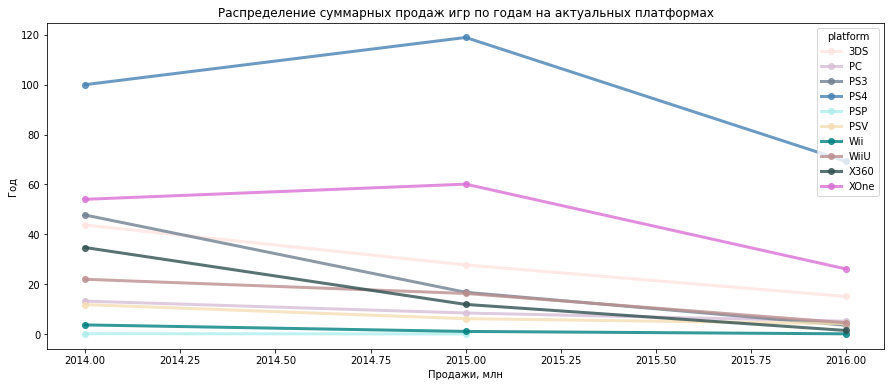

In [32]:
games_mock = data[(data['year_of_release'] != 2161)&(data['year_of_release'] >2013)]
platforms_current = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU','X360', 'XOne']

games_mock_plot_sum = games_mock.query('platform == @platforms_current')\
                                               .pivot_table(index='year_of_release',
                                                values='total_sales',
                                                columns='platform',
                                                aggfunc='sum')
games_mock_plot_sum.plot(style='o-',figsize=(15,6),linewidth=3,alpha =0.8,\
                      color=('mistyrose', 'thistle', 'slategrey','steelblue',\
                             'paleturquoise', 'wheat','teal', 'rosybrown','darkslategray', 'orchid','lavender'))

plt.title('Распределение cуммарных продаж игр по годам на актуальных платформах')
plt.xlabel('Продажи, млн')
plt.ylabel('Год')
plt.show()

На конец 2016 года лидируют по продажам следующие платформы топ 3 платформы:

- PS4;
- XOne;
- 3DS.

Затем идут PC, WiiU, PSV.
Количество продаж игр по данным, снижается по всем платформам. 

Падение на рынке связано со многими факторами: ужесточившаяся конкуренция между основными игроками переходит в ценовую конкуренцию и, несмотря на большое количество выпущенных на платформе **PS4**, **XOne** игр (`см. график ниже`), выручка падает.
См. [статью](https://ixbt.games/news/analitiki-igrovogo-rynka-ssha-v-noyabre-2016-obemy-prodazh-upali.html)

Кроме того, этот год ещё и переломный потому, что в 2016 году крупнейшим сегментом игрового рынка становится сегмент мобильных игрю См. [статью](https://json.tv/ict_telecom_analytics_view/issledovanie-mirovogo-i-rossiyskogo-rynka-igr-2016-god-20170502014806) и [статью](https://www.gamedeveloper.com/business/the-5-trends-that-defined-the-game-industry-in-2016).

В 2016 году делается упор на разработку более мощных консолей - Сони и Микрософт обещают выпустить улучшенные версии своих консолей ([статья](https://www.gamedeveloper.com/business/the-5-trends-that-defined-the-game-industry-in-2016))

В начале этого же года Nintendo прекращает выпуск Wii U для японского рынка [сслыка](https://3dnews.ru/946824/nintendo-prekrashchaet-vipusk-wii-u-dlya-yaponskogo-rinka)

Выберем топ пятерку (без Wii U)


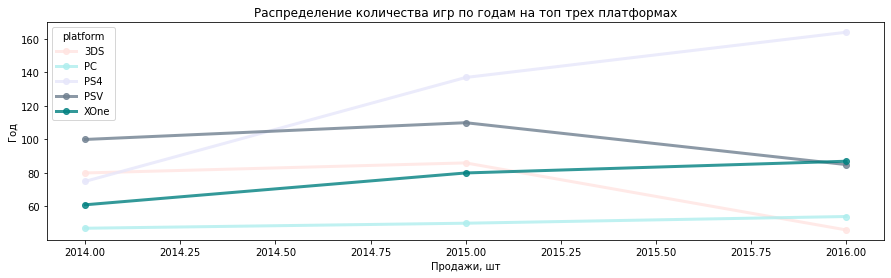

In [33]:
top_five = ['PS4','XOne','3DS', 'PC', 'PSV']
games_mock_plot_count = games_mock.query('platform == @top_five')\
                                               .pivot_table(index='year_of_release',
                                                values='total_sales',
                                                columns='platform',
                                                aggfunc='count')
games_mock_plot_count.plot(style='o-',figsize=(15,4),linewidth=3,alpha =0.8,\
                      color=('mistyrose','paleturquoise', 'lavender','slategrey','teal'))

plt.title('Распределение количества игр по годам на топ трех платформах')
plt.xlabel('Продажи, шт')
plt.ylabel('Год')
plt.show()

### 3.5. График «ящик с усами» <a name="subp35"></a>
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

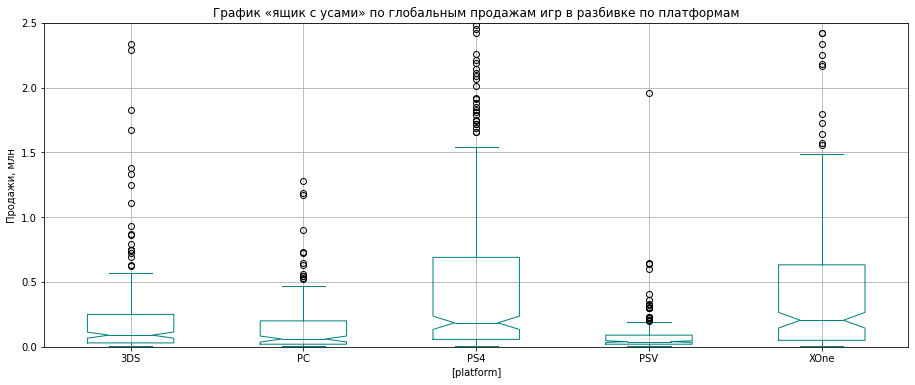

In [34]:
games_mock_top_five = games_mock.query('platform == @top_five')

boxplot_top_five = games_mock_top_five.boxplot(column=['total_sales'], by = ['platform'], notch = True,\
                                                   color='teal', figsize=(15,6));
plt.ylim(0,2.5)
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.suptitle('')
plt.ylabel('Продажи, млн')
plt.show()

In [35]:
games_mock_top_five.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


Медиана по пяти выбранным платформам - от 0,04 до 0,205 млн копий продаж.
У наиболее успешных платформ - PS4 и XOne - пороговое значение, за которым начинаются вбросы - 1.5 млн коппий.
У остальных платформ - от 0.25 до 0,5 миллионов копий.
То есть в целом по рынку количество продаж не преаавышает 1,5 илн штук даже на популярных платформах, но есть игры, которые "выстреливают" и продаются с огроиным отрывом. 
Очень большой разброс на рынке.

### 3.6. Диаграмма рассеяния <a name="subp36"></a>
Посмотрим, как влияют на продажи внутри одной популярной платформы  - PS4.
Вдияние отзывов пользователей и критиков оценим черездиаграмму рассеянияю
Также посчитаем корреляцию между отзывами и продажами. 

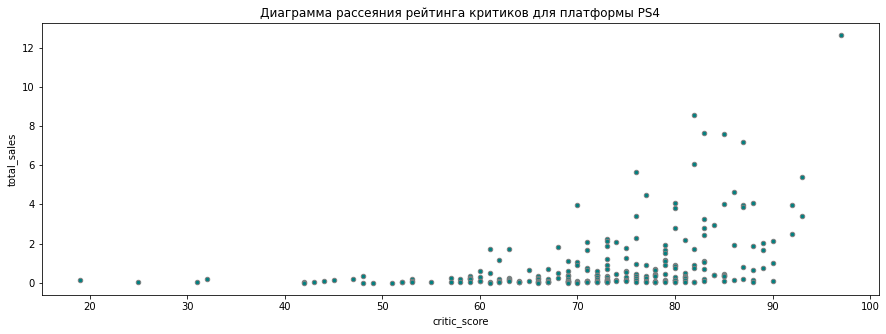

In [36]:
data_ps4 = games_mock[(games_mock['platform'] == 'PS4')&(games_mock['critic_score'] > 0)]
data_ps4.plot(kind='scatter', x='critic_score', y='total_sales', ec='gray', figsize=(15,5), color= 'teal')
plt.title('Диаграмма рассеяния рейтинга критиков для платформы PS4')
plt.show()

Видим, что чем выше рейтинг критиков, тем больше продаж.

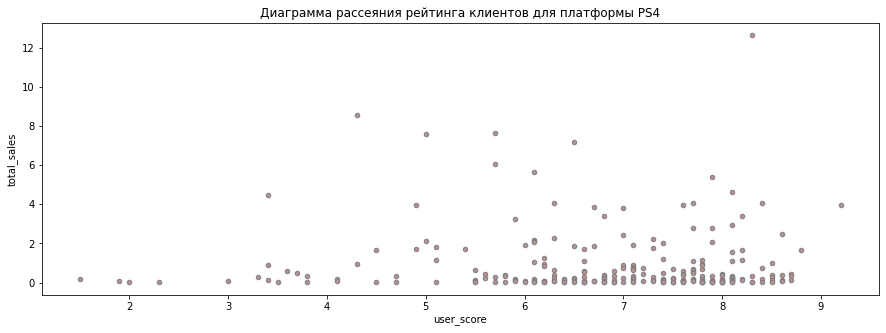

In [37]:
data_ps4 =games_mock[(games_mock['platform'] == 'PS4') & (games_mock['user_score'] > 0)&(games_mock['user_score']!= 66.6)]
data_ps4.plot(kind='scatter', x='user_score', y='total_sales', ec='gray', figsize=(15,5), color= 'rosybrown')
plt.title('Диаграмма рассеяния рейтинга клиентов для платформы PS4')
plt.show()

Для оценок пользователей не наблюдаем столь явной взаимосвязи.

In [38]:
ps4_cor = data_ps4[['total_sales' ,'critic_score', 'user_score']]
ps4_cor.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.401903,-0.040132
critic_score,0.401903,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Видим, что для оценок пользователей не наблюдается значительная корреляция, оценка критиков влияет в более значитеьной степени.

### 3.7. Продажи игр на других платформах <a name="subp37"></a>
Соотнесем выводы с продажами игр на других платформах.

PS4


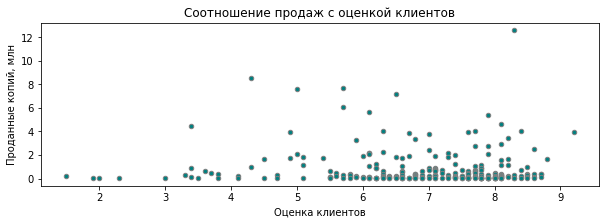

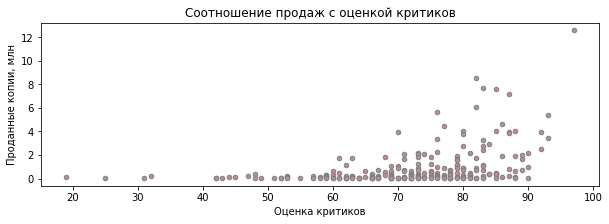

critic_score    0.402498
user_score     -0.040132
total_sales     1.000000
Name: total_sales, dtype: float64
XOne


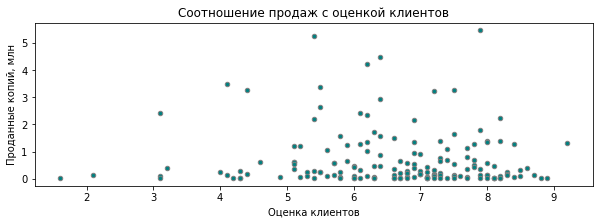

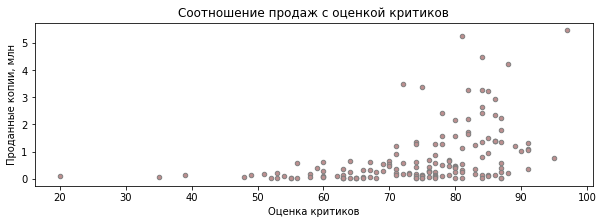

critic_score    0.424101
user_score     -0.070384
total_sales     1.000000
Name: total_sales, dtype: float64
3DS


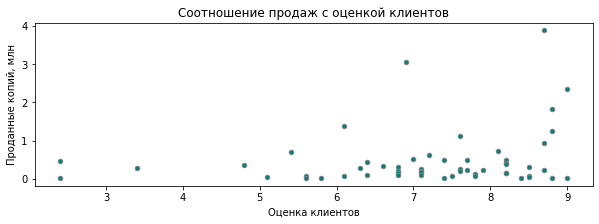

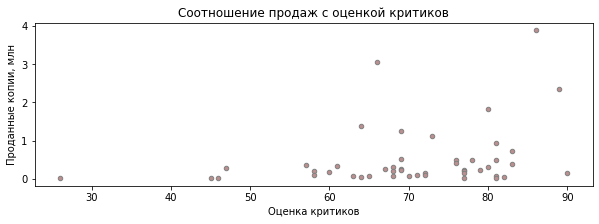

critic_score    0.284686
user_score      0.215193
total_sales     1.000000
Name: total_sales, dtype: float64
PC


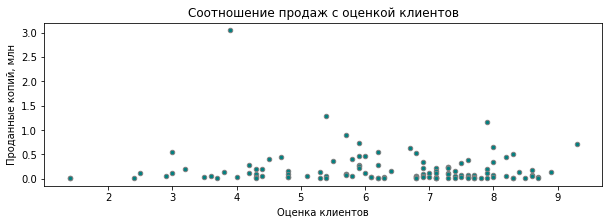

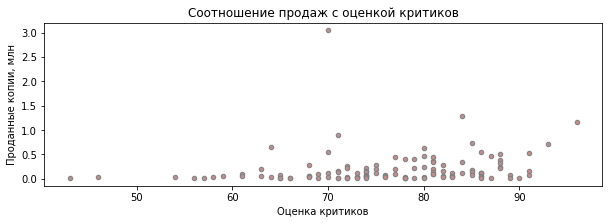

critic_score    0.174634
user_score     -0.071597
total_sales     1.000000
Name: total_sales, dtype: float64
PSV


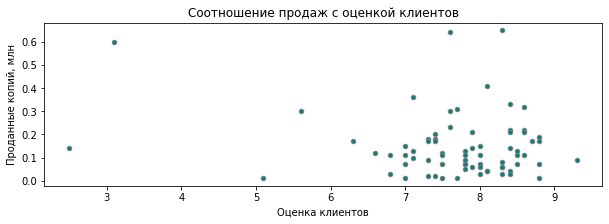

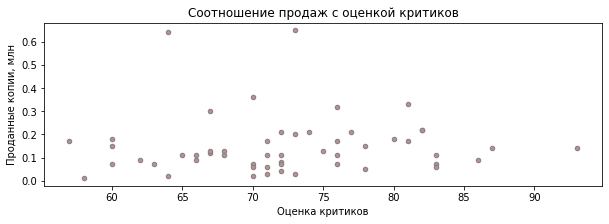

critic_score    0.041029
user_score     -0.168455
total_sales     1.000000
Name: total_sales, dtype: float64


In [39]:
games = games_mock[games_mock['user_score']!=66.6]
for xgames in top_five:
    games[games['platform'] == xgames].plot(x = 'user_score', y = 'total_sales', kind = 'scatter',ec='gray', figsize=(10,3), color= 'teal')
    print(xgames)
    plt.title('Соотношение продаж с оценкой клиентов')
    plt.xlabel('Оценка клиентов')
    plt.ylabel('Проданные копий, млн')
    games[games['platform'] == xgames].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter',ec='gray', figsize=(10,3), color='rosybrown')
    plt.title('Соотношение продаж с оценкой критиков')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Проданные копии, млн')
    plt.show()
    
    print(games.query('platform == @xgames')[['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

Видим по графикам, что оценки клиентов практически не влияют на продажи, оценки критиков влияют незначительно.

### 3.8. Распределение игр по жанрам <a name="subp38"></a>
Посмотрим на общее распределение игр по жанрам. 

(0.0, 4.0)

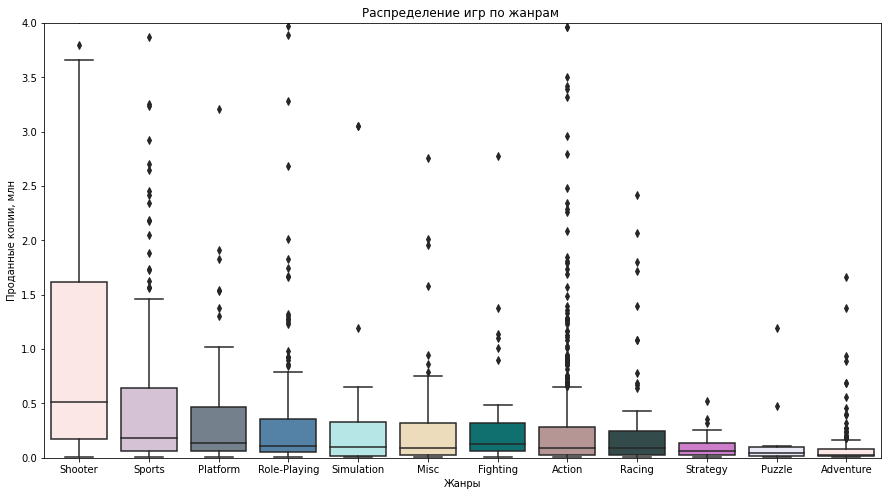

In [40]:
plt.figure(figsize=(15,8))
colors=('mistyrose', 'thistle', 'slategrey','steelblue','paleturquoise', 'wheat','teal', 'rosybrown','darkslategray', 'orchid','lavender')
sns.boxplot(data=games_mock, x='genre', y='total_sales',palette=colors,\
            order=["Shooter","Sports","Platform","Role-Playing","Simulation","Misc","Fighting","Action","Racing","Strategy","Puzzle","Adventure"])
plt.title('Распределение игр по жанрам ')
plt.xlabel('Жанры')
plt.ylabel('Проданные копии, млн')
plt.ylim(0,4)

Самые продаваемые жанры - шутеры, спортивные, платформенные.
Жанры с худшими показателями по проданным копиям - приключения и паззлы.

In [41]:
games_mock.groupby('genre')['total_sales'].describe().sort_values(by='75%',ascending = False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63
Sports,161.0,0.680000,1.239736,0.01,0.0600,0.180,0.6400,8.58
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Simulation,44.0,0.298409,0.646925,0.01,0.0200,0.100,0.3275,3.05
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09


Медианное значение по рынку колеблется от 0.3 до 0.5.
При этом у жанра Экшн - очень большие разбросы. Ьольшая часть игр продаётся до 0.28 млн, но при этом некоторые уникальные игры продаются аж до 12.6 млн, выше только у шутеров.

## 4. Портрет пользователя <a name="par4"></a>

 Опишем портетр пользователя по представленным регионам - Северной Америке, Европе,в Японии.
 

### 4.1. Самые популярные плаформы <a name="subp41"></a>

Определим для пользователей каждого региона (NA, EU, JP) топ-5 самых популярных платформ.

In [42]:
sales = ['na_sales', 'eu_sales', 'jp_sales']

In [43]:
def user (table, group, sales):
    user_data= table.groupby(group).agg({sales: 'sum'}).sort_values(by=sales, ascending=False)[:5]
    titles = {'na_sales': 'Продажи в северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    colors = {'na_sales': 'thistle', 'eu_sales': 'paleturquoise', 'jp_sales': 'wheat'}
    user_plot = user_data.plot(kind='bar', ec='gray',title=titles[sales],fontsize=14, color=colors[sales],rot =45, ylim = (0,140))
    plt.xlabel(group)
    print()

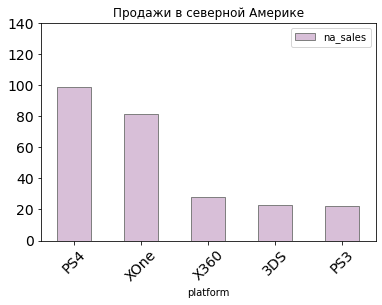

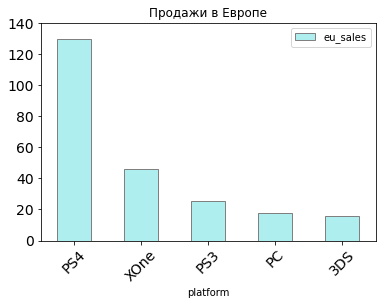

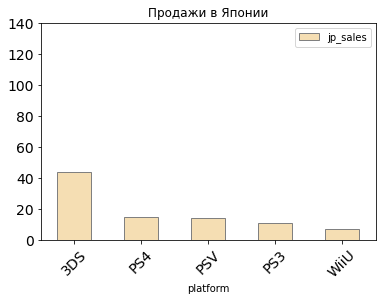

In [44]:
for s in sales:
    user (games_mock,'platform', s )

Видим по графикам, что для пользователей в Северной Америке, Европе,в Японии пятерка самых популярных программ выглядят по-разному в 2012-2016 гг.

В Северной Америке наиболее популярные консоли - X360, PS3, PS4. В Европе распредление немного иное - PS4, PS3, X360 - побеждает консоль PlayStation.

В Японии тройка лидеров совсем другая - выигрывает 3DS со значительным отрывом.

### 4.2. Самые популярные жанры <a name="subp42"></a>

Определим для пользователей каждого региона (NA, EU, JP) топ-5 самых популярных жанров.

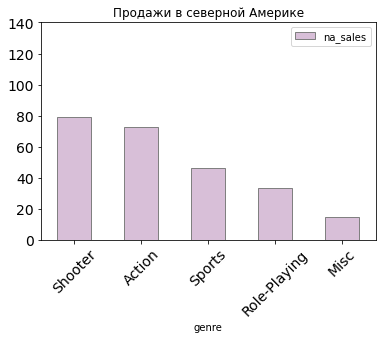

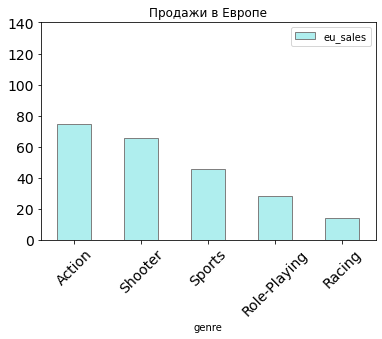

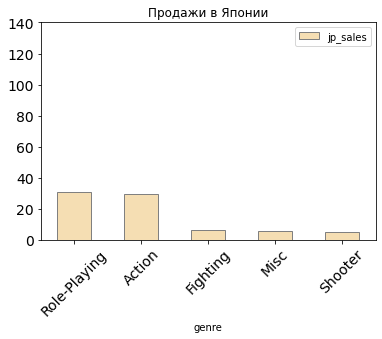

In [45]:
for s in sales:
    user (games_mock,'genre', s )

Видим по графикам, что для пользователей в Северной Америке, Европе,в Японии пятерка самых популярных жанров выглядят по-разному в 2012-2016 гг.
В Северной Америке наиболее популярные жанры - Action, Shooter, Sports,Role-Playing, Misc (разное).

В Европе распредление очень похоже, только пятый жанр - Racing.

В Японии тройка лидеров совсем другая - Role-Playing, Action, Misc, Simulation, Fighting.

### 4.3. Рейтин ESRB <a name="subp43"></a>

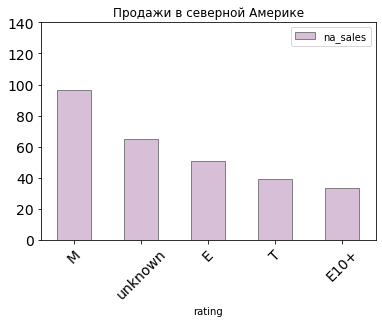

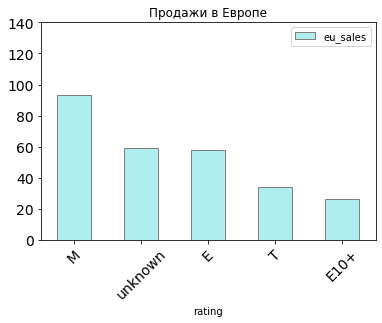

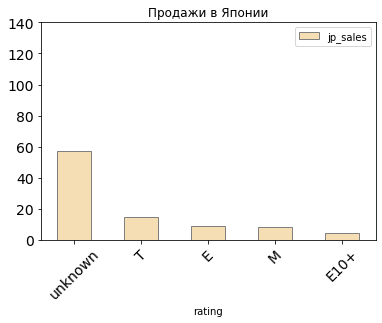

In [46]:
for s in sales:
    user (games_mock,'rating', s )

Продажи по Северной Америке и Европе очень похожи - больше всего продаж приходится на рейтинг М (старше 17), второе место - у игр, у которых рейтинг непонятен.Третье место -  Е (для всех возрастов), затем идуи категории Т (для подростков старше 13 лет) и  Е10 (старше 10).

В Японии картина сильно отличается, в первую очередь по тому, что мало рейтингов доступно.
Поэтому на первое место выходит рейтинг - неизвестно. 
Примерно одинаковое распределение продаж на рейтинги для подростков, для всех возрастов и для тех, кто старше 17.

## 5. Проверка гипотез <a name="par5"></a>

### 5.1. Средние рейтинги платформ Xbox One и PC <a name="subp51"></a>

`Гипотеза H₀`  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

`Гипотеза H₁` - Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [47]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [48]:
data_hyp = data.query('user_score!=66.6')

In [49]:
xbox = data_hyp[(data_hyp['platform'] == 'XOne') & (data_hyp['user_score'] > 0)]['user_score']
pc = data_hyp[(data_hyp['platform'] == 'PC') & (data_hyp['user_score'] > 0)]['user_score']
alpha = 0.05

results = st.ttest_ind(xbox, pc)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Гипотезу отвергаем, не можем утверждать, что средние пользовательские рейтинги платформ одинаковые.

### 5.2. Средние рейтинг жанров Action и Sports <a name="subp52"></a>

`Гипотеза H₀`  - Средние пользовательские рейтинги жанров Action и Sports одинаковые

`Гипотеза H₁` - Средние пользовательские рейтинги жанров Action и Sports не одинаковые

In [50]:
action = data_hyp[(data_hyp['genre'] == 'Action') & (data_hyp['user_score'] > 0)]['user_score']
sport = data_hyp[(data_hyp['genre'] == 'Sports') & (data_hyp['user_score'] > 0)]['user_score']
                                      
alpha = 0.05

result = st.ttest_ind(action, sport)
print('p-значение:', results.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Не получилось отвергнуть нулевую гипотезу


Гипотезу не получилось отвергнуть, вероятно, мы можем продолжать говорить, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## 6. Общий вывод <a name="par6"></a>

Интересный вывод, что рейтинги, как пользовательские, так, и в меньшей степени, рейтинги критиков, не значительно влияют на продажи.

Интересно обратить внимание, на то, как рынок ведет себя по-другом, как меняется и стагнируют продажи на консолях - возможно, это момент для того, чтобы постепенно переходить на другие рынки и меньше вкладывать деньги в развитие консолей.

Однако на конец 2016 года решение было прямо противоволожное - больше вкладываться в развитие механики и разработок, качества приставок.

Рынки и портеры ползователей по регионам отличаются - как по предпочитаемым платформам, так и по предпочитаемым жанрам.
При этом жанры для рынка Японии проставляется хуже - вероятно, нужно ближе рассмотреть процесс автоматических оценок и его применимость к превалирующим в Японии жанрам.

Говоря о рейтингах, нужно отметить, что система рейтингов ESRB широко используется в Америке и 
Канаде, и меньше - в Японии.
И данных видно, что почти у 65% проданных игр не было рейтинга при продажах в Японии, в Европе и Северной Америке - у 25-28% игр.

Продажи по Северной Америке и Европе похожи - больше всего продаж приходится на рейтинг М (старше 17), второе место - у игр, у которых рейтинг непонятен.Третье место -  Е (для всех возрастов), затем идуи категории Т (для подростков старше 13 лет) и  Е10 (старше 10).

В Японии картина отличается -  на первое место выходит рейтинг - unknown. 
Примерно одинаковое распределение продаж на рейтинги для подростков, для всех возрастов и для тех, кто старше 17.

В Европе и Северной Америке жесткая конкуренция между двумя платформами основными, что не наблюдается в Японии.
Возможно, есть смысл развивать нишевые рынки: Sports (т.к. рейтинг,веоятно, такой же как у более популярного у регионов Action.